In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set plotting style
sc.settings.set_figure_params(dpi=100, facecolor='white')
plt.rcParams['figure.figsize'] = (10, 6)

# Base paths
BASE_DIR = "/mnt/czi-sci-ai/intrinsic-variation-gene-ex/rnaseq"
RESULT_DIR = "/mnt/czi-sci-ai/intrinsic-variation-gene-ex/rnaseq/standardized_data/test_mini_pipeline_20250430_073015"

# Load datasets
encode_file = os.path.join(RESULT_DIR, "encode_standardized_v1.h5ad")
encoded_processed_file = os.path.join(RESULT_DIR, "preprocessed_data/encode_standardized_preprocessed.h5ad")

encode = sc.read_h5ad(encode_file)
encode_processed = sc.read_h5ad(encoded_processed_file)

# Display basic info
print(f"Original ENCODE: {encode.shape[0]} samples, {encode.shape[1]} genes")
print(f"Processed ENCODE: {encode_processed.shape[0]} samples, {encode_processed.shape[1]} genes")



Original ENCODE: 7 samples, 65586 genes
Processed ENCODE: 7 samples, 65586 genes


In [3]:
# Sample metadata analysis
print("\nSample metadata:")
print(encode.obs.head())


Sample metadata:
    _sample_id age cell_line    cell_type cell_type_info depletion  \
0  ENCFF244DNJ  58      A549   epithelial                     rRNA   
1  ENCFF685WJV  69     Caki2   epithelial                     rRNA   
2  ENCFF640FPG  53   GM23248   Fibroblast                     rRNA   
3  ENCFF863QWG  15     HepG2   epithelial                     rRNA   
4  ENCFF171FQU  53      K562  lymphoblast                     rRNA   

                                      description  \
0                  Human lung carcinoma cell line   
1     Human kidney clear cell carcinoma cell line   
2                 Human skin fibroblast cell line   
3  Human liver hepatocellular carcinoma cell line   
4    Human chronic myelogenous leukemia cell line   

                           disease ethnicity        geo_id  \
0                   adenocarcinoma  European  SAMN05733878   
1  clear cell renal cell carcinoma  European  SAMN04284635   
2                           normal  European  SAMN042845

In [4]:
# Gene ID analysis in processed data
ensembl_ids = sum(1 for id in encode_processed.var['ensembl_id'] if str(id).startswith('ENSG'))
entrez_ids = sum(1 for id in encode_processed.var['ensembl_id'] if str(id).startswith('ENTREZ:'))
other_ids = len(encode_processed.var) - ensembl_ids - entrez_ids

print("\nGene ID distribution:")
print(f"  Ensembl IDs: {ensembl_ids} ({ensembl_ids/len(encode_processed.var)*100:.2f}%)")
print(f"  Entrez IDs: {entrez_ids} ({entrez_ids/len(encode_processed.var)*100:.2f}%)")
print(f"  Other IDs: {other_ids} ({other_ids/len(encode_processed.var)*100:.2f}%)")




Gene ID distribution:
  Ensembl IDs: 65341 (99.63%)
  Entrez IDs: 224 (0.34%)
  Other IDs: 21 (0.03%)


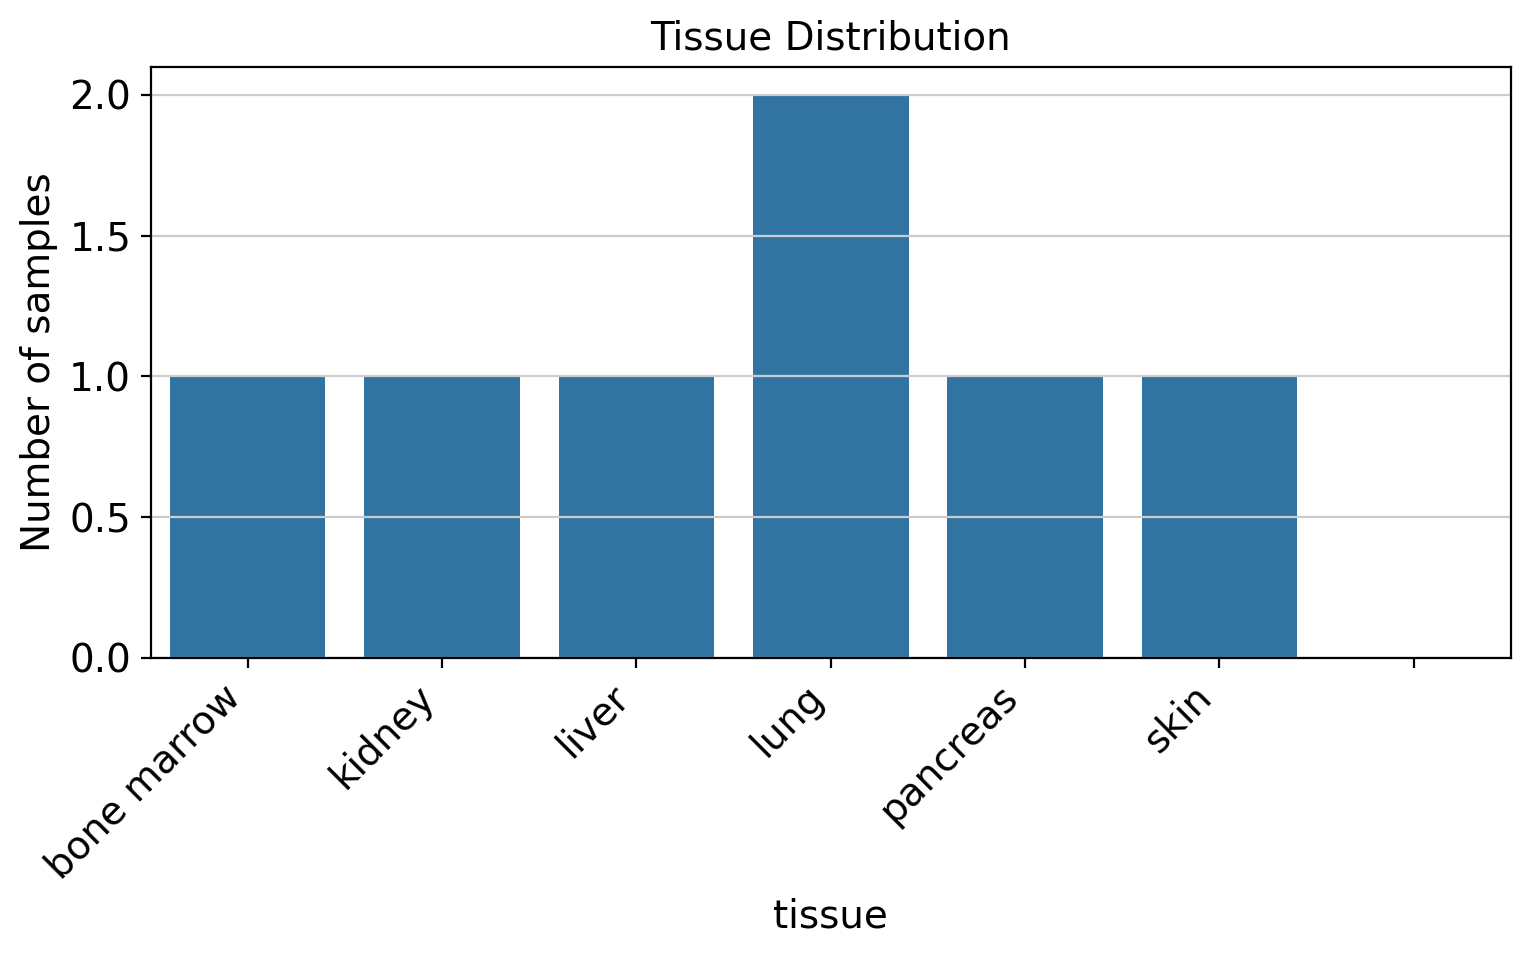

In [5]:
# Visualization: Tissue distribution
plt.figure(figsize=(8, 5))
tissue_counts = encode.obs['tissue'].value_counts()
sns.barplot(x=tissue_counts.index, y=tissue_counts.values)
plt.title('Tissue Distribution')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of samples')
plt.tight_layout()
plt.show()



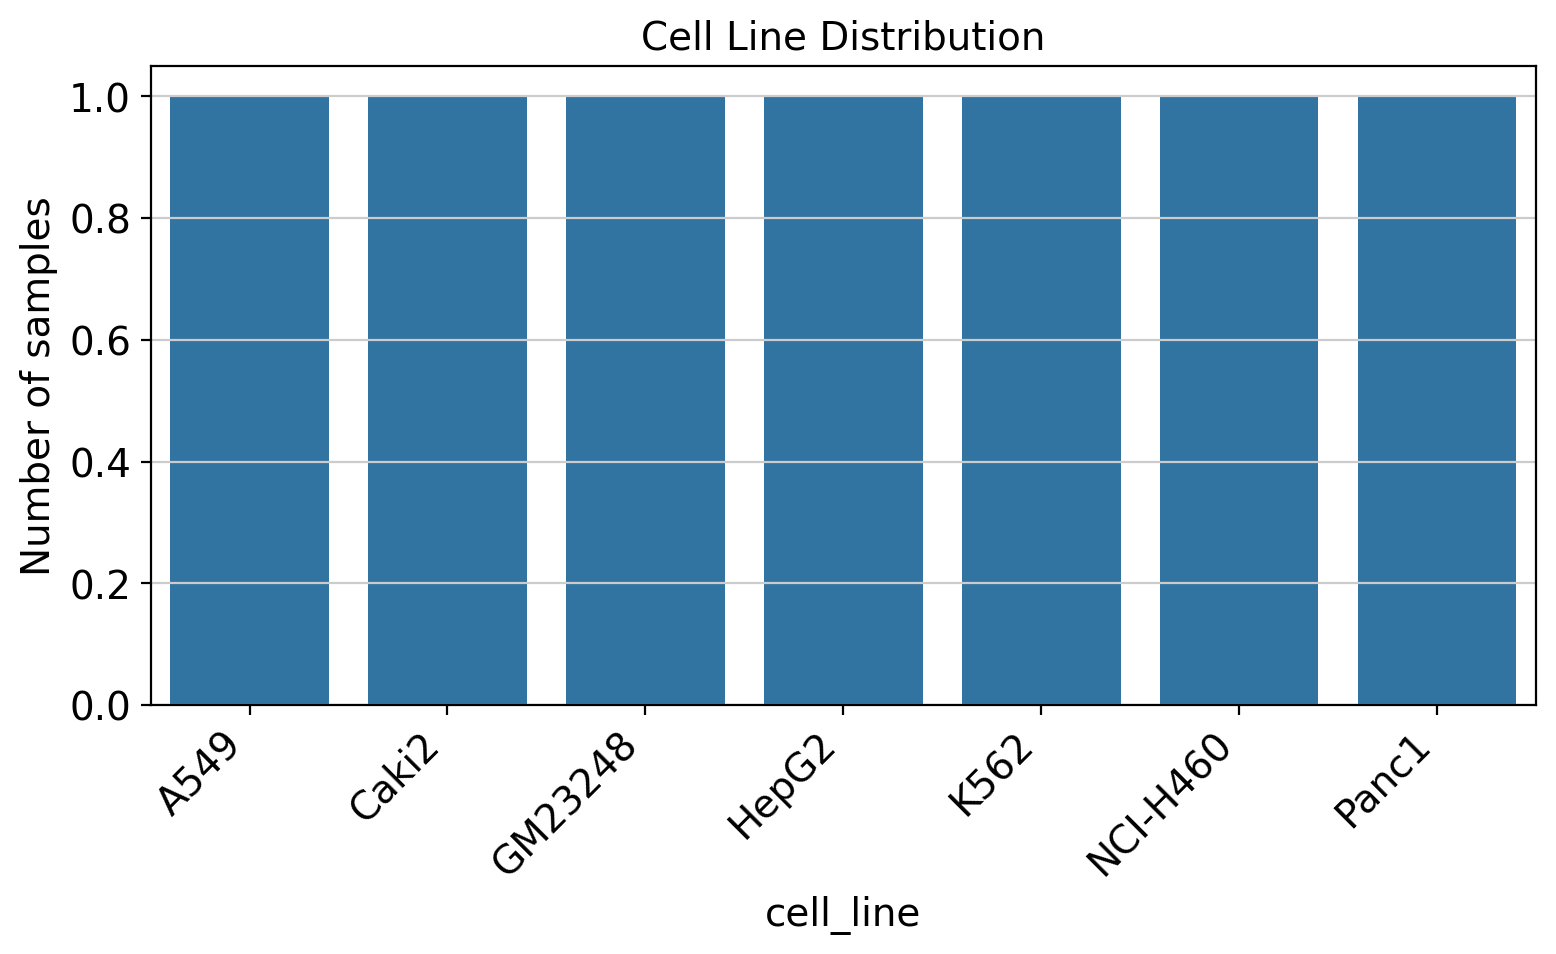

In [6]:
# Visualization: Cell line distribution
plt.figure(figsize=(8, 5))
cell_line_counts = encode.obs['cell_line'].value_counts()
sns.barplot(x=cell_line_counts.index, y=cell_line_counts.values)
plt.title('Cell Line Distribution')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of samples')
plt.tight_layout()
plt.show()

In [7]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sc.settings.set_figure_params(dpi=100, facecolor='white')
plt.rcParams['figure.figsize'] = (10, 6)

# Path to the preprocessed dataset with our fix
preprocessed_file = "/mnt/czi-sci-ai/intrinsic-variation-gene-ex/rnaseq/standardized_data/test_gene_id_fix_20250430_074622/output/encode_standardized_preprocessed.h5ad"

# Load the dataset
print("Loading preprocessed dataset...")
adata = sc.read_h5ad(preprocessed_file)
print(f"Loaded dataset with {adata.n_obs} samples and {adata.n_vars} genes")


Loading preprocessed dataset...


Loaded dataset with 7 samples and 65586 genes


/mnt/czi-sci-ai/intrinsic-variation-gene-ex/enformer/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [8]:

# Check column names in var DataFrame
print("\nColumn names in var DataFrame:")
print(adata.var.columns)




Column names in var DataFrame:
Index(['gene_id', 'original_gene_id', 'ensembl_id', 'gene_name', 'gene_type',
       'chromosome', 'mapping_source', 'mapping_confidence'],
      dtype='object')


In [9]:
# Create a DataFrame to view and compare the gene IDs
gene_id_df = pd.DataFrame({
    'gene_id': adata.var['gene_id'],
    'ensembl_id': adata.var['ensembl_id'],
    'original_gene_id': adata.var['original_gene_id']
})

# Show the first 10 rows
print("\nFirst 10 gene IDs:")
print(gene_id_df.head(10))




First 10 gene IDs:
           gene_id       ensembl_id  \
0  ENSG00000169045  ENSG00000169045   
1  ENSG00000278290  ENSG00000278290   
2  ENSG00000172428  ENSG00000172428   
3  ENSG00000231924  ENSG00000231924   
4  ENSG00000226137  ENSG00000226137   
5  ENSG00000118518  ENSG00000118518   
6  ENSG00000163666  ENSG00000163666   
7  ENSG00000231074  ENSG00000231074   
8  ENSG00000167114  ENSG00000167114   
9  ENSG00000188487  ENSG00000188487   

                                    original_gene_id  
0  ENST00000518548.5|ENSG00000169045.17|OTTHUMG00...  
1                                  ENSG00000278290.1  
2                                 ENSG00000172428.10  
3  ENST00000595124.5|ENSG00000231924.9|OTTHUMG000...  
4                                  ENSG00000226137.3  
5  ENST00000608340.5|ENSG00000118518.15|OTTHUMG00...  
6  ENST00000495160.2|ENSG00000163666.9|OTTHUMG000...  
7  ENST00000454129.5|ENSG00000231074.8|OTTHUMG000...  
8  ENST00000300456.4|ENSG00000167114.12|OTTHUMG00...  


In [10]:
# Count version numbers in each column
version_pattern = r'ENSG\d+\.\d+'
gene_id_versions = sum(gene_id_df['gene_id'].astype(str).str.match(version_pattern))
ensembl_id_versions = sum(gene_id_df['ensembl_id'].astype(str).str.match(version_pattern))
original_id_versions = sum(gene_id_df['original_gene_id'].astype(str).str.match(version_pattern))

print("\nGene IDs with version numbers:")
print(f"  gene_id column: {gene_id_versions} ({gene_id_versions/len(gene_id_df)*100:.2f}%)")
print(f"  ensembl_id column: {ensembl_id_versions} ({ensembl_id_versions/len(gene_id_df)*100:.2f}%)")
print(f"  original_gene_id column: {original_id_versions} ({original_id_versions/len(gene_id_df)*100:.2f}%)")




Gene IDs with version numbers:
  gene_id column: 0 (0.00%)
  ensembl_id column: 0 (0.00%)
  original_gene_id column: 20221 (30.83%)


In [11]:
# Extract some examples with version numbers
if original_id_versions > 0:
    examples = gene_id_df[gene_id_df['original_gene_id'].astype(str).str.match(version_pattern)].head(10)
    print("\nExamples of gene IDs with version numbers:")
    print(examples)
else:
    # Look for other patterns in original IDs
    print("\nNo version numbers found in original_gene_id. Showing sample original IDs for inspection:")
    print(gene_id_df['original_gene_id'].astype(str).value_counts().head(10))

# Check if there are differences between gene_id and ensembl_id columns
diff_count = sum(gene_id_df['gene_id'] != gene_id_df['ensembl_id'])
print(f"\nDifferences between gene_id and ensembl_id columns: {diff_count} ({diff_count/len(gene_id_df)*100:.2f}%)")




Examples of gene IDs with version numbers:
            gene_id       ensembl_id    original_gene_id
1   ENSG00000278290  ENSG00000278290   ENSG00000278290.1
2   ENSG00000172428  ENSG00000172428  ENSG00000172428.10
4   ENSG00000226137  ENSG00000226137   ENSG00000226137.3
12  ENSG00000261540  ENSG00000261540   ENSG00000261540.1
14  ENSG00000238225  ENSG00000238225   ENSG00000238225.1
15  ENSG00000113615  ENSG00000113615  ENSG00000113615.12
21  ENSG00000153046  ENSG00000153046  ENSG00000153046.17
31  ENSG00000211925  ENSG00000211925   ENSG00000211925.1
37  ENSG00000105254  ENSG00000105254  ENSG00000105254.11
38  ENSG00000146707  ENSG00000146707  ENSG00000146707.14

Differences between gene_id and ensembl_id columns: 0 (0.00%)


In [12]:
# Find genes where original_id is different from the standardized id
diff_from_original = sum(gene_id_df['gene_id'] != gene_id_df['original_gene_id'])
print(f"Differences between gene_id and original_gene_id columns: {diff_from_original} ({diff_from_original/len(gene_id_df)*100:.2f}%)")



Differences between gene_id and original_gene_id columns: 65565 (99.97%)


In [13]:
# For genes with Ensembl IDs, check if original is version of standardized
ensembl_genes = gene_id_df[gene_id_df['gene_id'].astype(str).str.startswith('ENSG')]
version_diffs = 0

for idx, row in ensembl_genes.iterrows():
    # Check if original ID is a versioned form of the standard ID
    std_id = str(row['gene_id'])
    orig_id = str(row['original_gene_id'])
    if orig_id.startswith(std_id + '.'):
        version_diffs += 1

print(f"\nOriginal IDs that are versioned forms of standardized IDs: {version_diffs} ({version_diffs/len(ensembl_genes)*100:.2f}% of Ensembl genes)")




Original IDs that are versioned forms of standardized IDs: 20253 (31.00% of Ensembl genes)


In [14]:
# Additional command to check the full distribution of gene types
if 'gene_type' in adata.var.columns:
    print("\nGene type distribution:")
    gene_type_counts = adata.var['gene_type'].value_counts()
    for gene_type, count in gene_type_counts.items():
        print(f"  {gene_type}: {count} ({count/len(adata.var)*100:.2f}%)")


Gene type distribution:
  protein_coding: 41470 (63.23%)
  lincRNA: 5092 (7.76%)
  processed_pseudogene: 4624 (7.05%)
  antisense: 3655 (5.57%)
  unknown: 1924 (2.93%)
  miRNA: 1322 (2.02%)
  unprocessed_pseudogene: 1279 (1.95%)
  misc_RNA: 1127 (1.72%)
  snRNA: 837 (1.28%)
  processed_transcript: 802 (1.22%)
  transcribed_unprocessed_pseudogene: 727 (1.11%)
  TEC: 470 (0.72%)
  snoRNA: 438 (0.67%)
  sense_intronic: 412 (0.63%)
  transcribed_processed_pseudogene: 337 (0.51%)
  rRNA: 248 (0.38%)
  unitary_pseudogene: 173 (0.26%)
  sense_overlapping: 147 (0.22%)
  IG_V_pseudogene: 97 (0.15%)
  IG_V_gene: 92 (0.14%)
  polymorphic_pseudogene: 66 (0.10%)
  TR_V_gene: 48 (0.07%)
  TR_J_gene: 36 (0.05%)
  scaRNA: 28 (0.04%)
  spike_in_control: 21 (0.03%)
  IG_D_gene: 21 (0.03%)
  TR_V_pseudogene: 12 (0.02%)
  3prime_overlapping_ncrna: 11 (0.02%)
  Mt_tRNA: 10 (0.02%)
  pseudogene: 10 (0.02%)
  IG_C_gene: 9 (0.01%)
  IG_J_gene: 8 (0.01%)
  transcribed_unitary_pseudogene: 7 (0.01%)
  TR_C_gene